# Customer Default Payment Prediction Model
### -Data Magician Team-
Dataset : datatrain from (https://www.kaggle.com/datasets/reverie5/av-janata-hack-payment-default-prediction)

### Introduction

Pada Notebook ini akan dilakukan data modeling untuk memprediksi customer default payment dengan model klasifikasi.
Sebelum dilakukan modeling pada data, akan dilakukan Exploratory Data Analysis yang dapat diakses pada notebook https://github.com/iqbalmudzakky/final_project/blob/main/1-Exploratory%20Data%20Analysis.ipynb

Dataset yang akan digunakan merupakan dataset dari kaggle yaitu data train Payment Default Prediction Data.
Berikut merupakan penjelasan dari kolom-kolom pada dataset

> * ID : Unique ID of each client <br>
> * LIMIT_BAL : Amount of given credit (NT dollars): It includes both the individual consumer credit and his/her family (supplementary) credit<br>
> * SEX : Gender (1=male, 2=female)<br>
> * EDUCATION : 1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)<br>
> * MARRIAGE : Marital status (1=married, 2=single, 3=divorced)<br>
> * AGE : Age of the client<br>
> * PAY_0 - PAY_6 : Repayment status in April until September(-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, ... 8=payment delay for eight months, 9=payment delay for nine months and above)<br>
> * BILL_AMT 1 - BILL_AMT2 : Amount of bill statement in each month, 2005 (NT dollar)<br>
> * PAY_AMT1 - PAY_6 : Amount of previous payment in each month, 2005 (NT dollar)<br>
> * default_payment_next_month  : Target Variable: Default payment (1=yes, 0=no)

### Library and Data Import

In [4]:
# Library import
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

print('version numpy :',np.__version__) 
print('version pandas :',pd.__version__)

version numpy : 1.24.2
version pandas : 1.5.3


In [5]:
# DATA IMPORT

dftrain = pd.read_csv('train_20D8GL3.csv')
dftrain.head(5)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment_next_month
0,25150,360000,2,2,2,25,-1,-1,-1,-1,...,3435,8870,2020,12590,3479,3446,8870,2020,27043,0
1,13470,240000,2,1,2,46,2,2,-2,-1,...,2240,1681,2267,0,0,2240,0,2267,3074,0
2,3092,320000,2,2,1,41,0,0,0,0,...,35409,35036,35939,5000,2000,2000,3000,3000,1500,0
3,13973,50000,2,2,2,24,-1,-1,-2,-2,...,0,0,0,0,0,0,0,0,0,1
4,10567,80000,1,3,1,52,-1,0,0,0,...,20561,21261,21457,1500,1500,1500,1028,876,1449,0


Sebelum lanjut pada data preprocessing, akan dilakukan penggantian nama kolom agar lebih mudah melakukan intepretasi data.

In [6]:
# Rename PAY_0 column
dftrain.rename(columns={'PAY_0': 'PAY_Sep',
                        'PAY_2' : 'PAY_Aug',
                        'PAY_3' : 'PAY_Jul',
                        'PAY_4' : 'PAY_Jun',
                        'PAY_5' : 'PAY_May',
                        'PAY_6' : 'PAY_Apr',
                        'BILL_AMT1' : 'BILL_AMT_Sep',
                        'BILL_AMT2' : 'BILL_AMT_Aug',
                        'BILL_AMT3' : 'BILL_AMT_Jul',
                        'BILL_AMT4' : 'BILL_AMT_Jun',
                        'BILL_AMT5' : 'BILL_AMT_May',
                        'BILL_AMT6' : 'BILL_AMT_Apr',
                        'PAY_AMT1' : 'PAY_AMT_Sep',
                        'PAY_AMT2' : 'PAY_AMT_Aug',
                        'PAY_AMT3' : 'PAY_AMT_Jul',
                        'PAY_AMT4' : 'PAY_AMT_Jun',
                        'PAY_AMT5' : 'PAY_AMT_May',
                        'PAY_AMT6' : 'PAY_AMT_Apr'}, inplace=True)

### Data Preprocessing

Pada Exploratory Data Analysis, diketahui bahwa pada dataset yang akan digunakan telah bersih dari missing data dan duplicated data, sehingga tidak perlu dilakukan pembersihan. <br>
Untuk tahapan pre-processing yang pertama dilakukan adalah feature encoding untuk mengkonversi dataset mentah ke dalam bentuk numerik yang dapat diproses oleh algoritma machine learning.

In [7]:
# Feature Encoding
#feature encoding sex
dftrain['SEX'] = dftrain['SEX'].replace({1:0,2:1}) # replace male as 0, and female as 1
dftrain['MARRIAGE'] = dftrain['MARRIAGE'].replace({2:0, 3:0}) # replace marriage as 1, and replace single, divorced, and unknown with 0
dftrain['EDUCATION'] = dftrain['EDUCATION'].replace({2 : 1, 3 : 1, 4 : 1, 0 : 1, 5 : 0, 6 : 0}) # replace graduate school, university, others, and elementary school with 1, and unknown with 0

In [8]:
dftrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21000 entries, 0 to 20999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          21000 non-null  int64
 1   LIMIT_BAL                   21000 non-null  int64
 2   SEX                         21000 non-null  int64
 3   EDUCATION                   21000 non-null  int64
 4   MARRIAGE                    21000 non-null  int64
 5   AGE                         21000 non-null  int64
 6   PAY_Sep                     21000 non-null  int64
 7   PAY_Aug                     21000 non-null  int64
 8   PAY_Jul                     21000 non-null  int64
 9   PAY_Jun                     21000 non-null  int64
 10  PAY_May                     21000 non-null  int64
 11  PAY_Apr                     21000 non-null  int64
 12  BILL_AMT_Sep                21000 non-null  int64
 13  BILL_AMT_Aug                21000 non-null  int64
 14  BILL_A

Semua kolom telah diencode menjadi data numerik. Selanjutnya akan dilakukan data splitting menjadi data train dan data test terlebih dahulu, karena kedua data tersebut memerlukan perlakuan yang berbeda. Splitting data ini juga dilakukan untuk menghindari kebocoran data test ke dalam data train yang dapat menyebabkan hasil yang salah dalam penilaian kinerja model dan menyebabkan model tampak lebih baik daripada yang sebenarnya.

In [9]:
ind_var = dftrain.drop(['ID','default_payment_next_month'],axis = 1)
ind_var = ind_var.columns.to_list() #kolom independent variable

X = dftrain[ind_var]
y = dftrain[['default_payment_next_month']]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

Data train dan test dibagi dengan perbandingan 70:30

Feature train disimpan dalam X_train, dan target train disimpan dalam variable y_train. Sedangkan Feature test disimpan dalam X_test, dan target test disimpan dalam variable y_test.

Selanjutnya, akan dilakukan outlier handling dengan kaidah IQR. Outlier handling ini hanya dilakukan pada data train saja. Hal ini dilakukan karena tujuan utama dari outlier handling adalah untuk meningkatkan kinerja model pada data training dan mencegah model mengalami overfitting pada data training. Jika outlier handling dilakukan pada data testing atau data baru yang akan digunakan untuk prediksi di masa depan, ini dapat mengakibatkan kesalahan yang tidak diinginkan dalam prediksi. Outlier handling pada data testing atau data baru akan menyebabkan data tersebut tidak sesuai dengan data yang digunakan saat melatih model. Hal ini dapat menghasilkan model yang terlalu kaku dan kurang mampu menghasilkan prediksi yang akurat pada data yang belum pernah dilihat sebelumnya.

In [10]:
# Menyatukan X_train, y_train kembali
merge_train = pd.concat([X_train,y_train], axis = 1)

# Outliers handling

print(f'Jumlah baris sebelum memfilter outlier : {len(merge_train)}')
nums = ['LIMIT_BAL','AGE','BILL_AMT_Sep','BILL_AMT_Aug','BILL_AMT_Jul','BILL_AMT_Jun','BILL_AMT_May',
        'BILL_AMT_Apr', 'PAY_AMT_Sep','PAY_AMT_Aug','PAY_AMT_Jul','PAY_AMT_Jun','PAY_AMT_May','PAY_AMT_Apr']
for i in nums:
    q1 = merge_train[i].quantile(0.25)
    q3 = merge_train[i].quantile(0.75)
    iqr = q3 - q1
    low_limit = q1 - (1.5 * iqr)
    high_limit = q3 + (1.5 * iqr)
    filtered_entries = ((merge_train[i] >= low_limit) & (merge_train[i] <= high_limit))
    
merge_train = merge_train[filtered_entries] 

print(f'Jumlah baris setelah memfilter outlier : {len(merge_train)}')

Jumlah baris sebelum memfilter outlier : 14700
Jumlah baris setelah memfilter outlier : 13245


In [11]:
# memisahkan dataset train kembali
X_train = merge_train.drop('default_payment_next_month',axis = 1)
y_train = merge_train[['default_payment_next_month']]

Setelah itu, dilakukan feature transformation yaitu dengan melakukan standarisasi nilai feature. Hal ini dilakukan untuk mengubah nilai feature menjadi memiliki skala yang sama. Feature transformation ini dilakukan baik pada data train maupun data test.

In [12]:
#menggunakan standardization (scaler)

from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

numerical_features = X[nums].columns.to_list()
for i in numerical_features:
    scaler = ss.fit(X_train[[i]])
    X_train[i] = scaler.transform(X_train[[i]])
    X_test[i] = scaler.transform(X_test[[i]])

display(X_train.describe())
display(X_test.describe())


,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_Sep,PAY_Aug,PAY_Jul,PAY_Jun,PAY_May,...,BILL_AMT_Jul,BILL_AMT_Jun,BILL_AMT_May,BILL_AMT_Apr,PAY_AMT_Sep,PAY_AMT_Aug,PAY_AMT_Jul,PAY_AMT_Jun,PAY_AMT_May,PAY_AMT_Apr
count,1.324500e+04,13245.000000,13245.000000,13245.000000,1.324500e+04,13245.000000,13245.000000,13245.000000,13245.000000,13245.000000,...,1.324500e+04,1.324500e+04,1.324500e+04,1.324500e+04,1.324500e+04,1.324500e+04,1.324500e+04,1.324500e+04,1.324500e+04,1.324500e+04
mean,8.502909e-17,0.606040,0.988146,0.452926,7.188579e-17,0.021140,-0.096263,-0.131597,-0.192676,-0.239034,...,-3.808874e-17,1.609383e-17,2.575013e-17,9.870884e-17,1.287507e-17,-1.180214e-17,3.111474e-17,-2.145844e-18,-1.180214e-17,6.544826e-17
std,1.000038e+00,0.488645,0.108231,0.497798,1.000038e+00,1.136424,1.221914,1.229840,1.201287,1.169016,...,1.000038e+00,1.000038e+00,1.000038e+00,1.000038e+00,1.000038e+00,1.000038e+00,1.000038e+00,1.000038e+00,1.000038e+00,1.000038e+00
min,-1.207694e+00,0.000000,0.000000,0.000000,-1.554403e+00,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-1.516596e+00,-3.860511e+00,-1.758329e+00,-2.613412e+00,-3.451685e-01,-2.793835e-01,-3.130672e-01,-3.059016e-01,-3.175540e-01,-8.883237e-01
25%,-8.767557e-01,0.000000,1.000000,0.000000,-7.997478e-01,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-6.854665e-01,-6.817431e-01,-6.848557e-01,-6.850646e-01,-2.921459e-01,-2.427181e-01,-2.888627e-01,-2.918868e-01,-3.048103e-01,-8.883237e-01
50%,-2.148787e-01,1.000000,1.000000,0.000000,-1.529007e-01,0.000000,0.000000,0.000000,0.000000,0.000000,...,-3.924846e-01,-3.749521e-01,-3.647517e-01,-3.725607e-01,-1.980878e-01,-1.626147e-01,-1.935298e-01,-2.017913e-01,-1.992923e-01,-3.840434e-01
75%,5.297329e-01,1.000000,1.000000,1.000000,6.017542e-01,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.438834e-01,2.186872e-01,2.423557e-01,2.597855e-01,1.003132e-02,-2.418523e-02,-1.956947e-02,-2.560449e-02,-2.020059e-02,4.869863e-01
max,5.162872e+00,1.000000,1.000000,1.000000,4.267221e+00,8.000000,7.000000,8.000000,8.000000,8.000000,...,1.109309e+01,1.234613e+01,9.221079e+00,9.933033e+00,3.593654e+01,7.136309e+01,2.916976e+01,3.949629e+01,2.603093e+01,3.612149e+00


,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_Sep,PAY_Aug,PAY_Jul,PAY_Jun,PAY_May,...,BILL_AMT_Jul,BILL_AMT_Jun,BILL_AMT_May,BILL_AMT_Apr,PAY_AMT_Sep,PAY_AMT_Aug,PAY_AMT_Jul,PAY_AMT_Jun,PAY_AMT_May,PAY_AMT_Apr
count,6300.000000,6300.000000,6300.000000,6300.000000,6300.000000,6300.000000,6300.000000,6300.000000,6300.000000,6300.000000,...,6300.000000,6300.000000,6300.000000,6300.000000,6300.000000,6300.000000,6300.000000,6300.000000,6300.000000,6300.000000
mean,0.073813,0.610476,0.990635,0.457778,-0.006453,-0.006667,-0.131429,-0.178254,-0.219206,-0.261746,...,0.076204,0.071951,0.070733,0.070726,0.067114,0.052919,0.057117,0.078005,0.093899,1.479522
std,1.060059,0.487681,0.096327,0.498254,0.989117,1.106183,1.185399,1.172448,1.163440,1.133660,...,1.161762,1.158766,1.165245,1.170730,1.144832,1.043682,1.168414,1.224074,1.431407,8.584819
min,-1.207694,0.000000,0.000000,0.000000,-1.554403,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-3.421312,-2.221742,-2.316781,-1.492926,-0.345169,-0.279384,-0.313067,-0.305902,-0.317554,-0.888324
25%,-0.876756,0.000000,1.000000,0.000000,-0.799748,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-0.679815,-0.676790,-0.678941,-0.681995,-0.271628,-0.224385,-0.283665,-0.281736,-0.300562,-0.842480
50%,-0.132144,1.000000,1.000000,0.000000,-0.152901,0.000000,0.000000,0.000000,0.000000,0.000000,...,-0.378714,-0.364657,-0.355368,-0.355666,-0.190697,-0.162002,-0.179423,-0.185774,-0.190117,-0.200669
75%,0.695202,1.000000,1.000000,1.000000,0.601754,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.333616,0.307911,0.273066,0.284366,0.022533,0.012539,0.014250,0.014438,0.022278,0.945423
max,5.328341,1.000000,1.000000,1.000000,4.267221,8.000000,8.000000,7.000000,8.000000,7.000000,...,11.093365,10.682184,10.087846,9.340423,23.409390,23.132944,29.457835,26.265306,35.194089,241.471554


Kemudian akan dilakukan Class Imbalance Handling, sebelumnya akan dilihat dulu apakah data train memiliki masalah class imbalance:

In [13]:
#check apakah variable target memiliki data yang imbalance?
y_train.value_counts()

default_payment_next_month
0                             10169
1                              3076
dtype: int64

Diketahui class 0 dan 1 memiliki banyak record data yang tidak seimbang, sehingga perlu dilakukan class imbalance handling.

In [14]:
#penentuan variable (x) independen dengan variable (y) dependen
X = X_train[[i for i in X_train.columns]]
y = y_train['default_payment_next_month']

#balancing over and under sampling through imblearn

from imblearn import under_sampling, over_sampling

X_under, y_under = under_sampling.RandomUnderSampler(random_state = 42).fit_resample(X, y)
X_over, y_over = over_sampling.RandomOverSampler(random_state = 42).fit_resample(X, y)
X_over_smote, y_over_smote = over_sampling.SMOTE(random_state = 42).fit_resample(X, y)

print('Class data train awal :\n',pd.Series(y).value_counts())
print('Class data train dengan undersampling :\n', pd.Series(y_under).value_counts())
print('Class data train dengan oversampling :\n', pd.Series(y_over).value_counts())
print('Class data train dengan SMOTE :\n', pd.Series(y_over_smote).value_counts())

Class data train awal :
 0    10169
1     3076
Name: default_payment_next_month, dtype: int64
Class data train dengan undersampling :
 0    3076
1    3076
Name: default_payment_next_month, dtype: int64
Class data train dengan oversampling :
 0    10169
1    10169
Name: default_payment_next_month, dtype: int64
Class data train dengan SMOTE :
 0    10169
1    10169
Name: default_payment_next_month, dtype: int64


### Data Modeling

#### Cross Validation

Hal pertama yang akan dilakukan adalah melakukan cross validation untuk mengevaluasi kinerja model dan memastikan bahwa model yang dibangun dapat generalisasi dengan baik pada data yang belum pernah dilihat sebelumnya.

In [15]:
#def function model cross_validation

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import cross_validate

def cross_validation(model):    
    score_rec_under = cross_validate(model, X_under, y_under, cv=5, scoring='recall', return_train_score=True)
    score_auc_under = cross_validate(model, X_under, y_under, cv=5, scoring='roc_auc', return_train_score=True)
    print('(crossval train - under sampling): recall : '+ str(score_rec_under['train_score'].mean()) + ', roc_auc : ' + str(score_auc_under['train_score'].mean()))
    print('(crossval test - under sampling): recall : '+ str(score_rec_under['test_score'].mean()) + ', roc_auc : ' + str(score_rec_under['test_score'].mean()))
    score_rec_over = cross_validate(model, X_over, y_over, cv=5, scoring='recall', return_train_score=True)
    score_auc_over = cross_validate(model, X_over, y_over, cv=5, scoring='roc_auc', return_train_score=True)
    print('(crossval train - over sampling) recall : '+ str(score_rec_over['train_score'].mean()) + ', roc_auc : ' + str(score_auc_over['train_score'].mean()))
    print('(crossval test - over sampling) recall : '+ str(score_auc_over['test_score'].mean()) + ', roc_auc : '+ str(score_auc_over['test_score'].mean()))
    score_rec_smote = cross_validate(model, X_over_smote, y_over_smote, cv=5, scoring='recall', return_train_score=True)
    score_auc_smote = cross_validate(model, X_over_smote, y_over_smote, cv=5, scoring='roc_auc', return_train_score=True)
    print('(crossval train - smote) recall : '+ str(score_rec_smote['train_score'].mean())+ ', roc_auc : '+ str(score_auc_smote['train_score'].mean()))
    print('(crossval test - smote) recall : '+ str(score_rec_smote['test_score'].mean()) + ', roc_auc : '+ str(score_auc_smote['test_score'].mean()))

In [16]:
#Cross Validation for Logistic Regression
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
cross_validation(lr)

(crossval train - under sampling): recall : 0.6591349606710207, roc_auc : 0.72686869911739
(crossval test - under sampling): recall : 0.6544140006335128, roc_auc : 0.6544140006335128
(crossval train - over sampling) recall : 0.6650359167659318, roc_auc : 0.7291345060521002
(crossval test - over sampling) recall : 0.7273894681298534, roc_auc : 0.7273894681298534
(crossval train - smote) recall : 0.6693626723089168, roc_auc : 0.7426036995029905
(crossval test - smote) recall : 0.6676182709965994, roc_auc : 0.7398590041920754


In [17]:
#Cross Validation for Decision Tree

from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=42)
cross_validation(dt)

(crossval train - under sampling): recall : 0.998618282607044, roc_auc : 0.9999989265014243
(crossval test - under sampling): recall : 0.6277589483687045, roc_auc : 0.6277589483687045
(crossval train - over sampling) recall : 0.9999016625177756, roc_auc : 0.9999988546590325
(crossval test - over sampling) recall : 0.8799741145726301, roc_auc : 0.8799741145726301
(crossval train - smote) recall : 0.9992132910768927, roc_auc : 0.999999649454732
(crossval test - smote) recall : 0.7817944911903446, roc_auc : 0.7596972970784599


In [18]:
#Cross Validation for XGBoost

from xgboost import XGBClassifier
xg = XGBClassifier(random_state=42)
cross_validation(xg)

(crossval train - under sampling): recall : 0.9633442020726587, roc_auc : 0.9953981544407601
(crossval test - under sampling): recall : 0.6573408299018055, roc_auc : 0.6573408299018055
(crossval train - over sampling) recall : 0.9397679642754188, roc_auc : 0.9823869092890487
(crossval test - over sampling) recall : 0.9217958527407392, roc_auc : 0.9217958527407392
(crossval train - smote) recall : 0.9142741495377598, roc_auc : 0.9890372127756898
(crossval test - smote) recall : 0.7904596768849868, roc_auc : 0.9229728892174611


In [19]:
#Cross Validation for Random Forest

from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=42)
cross_validation(rf)

(crossval train - under sampling): recall : 0.9997561966680211, roc_auc : 0.9999987283410281
(crossval test - under sampling): recall : 0.6339346425931792, roc_auc : 0.6339346425931792
(crossval train - over sampling) recall : 0.9999754148740012, roc_auc : 0.99997990074509
(crossval test - over sampling) recall : 0.9839936706269858, roc_auc : 0.9839936706269858
(crossval train - smote) recall : 0.9996804024273279, roc_auc : 0.999999604125572
(crossval test - smote) recall : 0.8426647629743451, roc_auc : 0.9239500355440675


Secara keseluruhan, hasil cross validation dari semua model menunjukkan bahwa model cenderung mengalami overfitting pada data train dan underfitting pada data test, sehingga perlu dilakukan tuning pada model. Selain itu, hasil recall dan ROC AUC pada test set yang rendah juga menunjukkan bahwa model cenderung tidak dapat membedakan kelas positif dan negatif dengan baik pada data test, sehingga hasil prediksi pada kasus-kasus tertentu perlu dipertimbangkan dengan hati-hati. <br>
Tetapi keseluruhan cross validation, memiliki nilai yang sudah cukup baik pada data dengan undersampling, oversampling, dan smote pada tiap algoritma model, sehingga tetap akan dilakukan testing pada tiap dataset.<br>
Hasil di bawah merupakan hasil model dengan data train dengan performa terbaik pada tiap model.

### Modeling

#### Evaluation function

In [20]:
# def evaluation function
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import numpy as np
from matplotlib import pyplot as plt

def under_sampling_eval(model) :
    y_pred = model.predict(X_test) #predict label
    y_pred_train = model.predict(X_under) #predict label
    y_pred_proba = model.predict_proba(X_test) #predict probability
    y_pred_proba_train = model.predict_proba(X_under) #predict probability
    
    print('Accuracy (Train Set): %.2f' % accuracy_score(y_under, y_pred_train))
    print('Accuracy (Test Set): %.2f' % accuracy_score(y_test, y_pred))
    
    print('Precision (Train Set): %.2f' % precision_score(y_under, y_pred_train))
    print('Precision (Test Set): %.2f' % precision_score(y_test, y_pred))
    
    print('Recall (Train Set): %.2f' % recall_score(y_under, y_pred_train))
    print('Recall (Test Set): %.2f' % recall_score(y_test, y_pred))
    
    print('AUC (train-proba): %.2f' % roc_auc_score(y_under, y_pred_proba_train[:,1]))
    print('AUC (test-proba): %.2f' % roc_auc_score(y_test, y_pred_proba[:,1]))
    
    print('F1-Score (Train Set): %.2f' % f1_score(y_under, y_pred_train))
    print('F1-Score (Test Set): %.2f' % f1_score(y_test, y_pred))

In [21]:
# def evaluation function
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import numpy as np
from matplotlib import pyplot as plt

def over_sampling_eval(model) :
    y_pred = model.predict(X_test) #predict label
    y_pred_train = model.predict(X_over) #predict label
    y_pred_proba = model.predict_proba(X_test) #predict probability
    y_pred_proba_train = model.predict_proba(X_over) #predict probability
    
    print('Accuracy (Train Set): %.2f' % accuracy_score(y_over, y_pred_train))
    print('Accuracy (Test Set): %.2f' % accuracy_score(y_test, y_pred))
    
    print('Precision (Train Set): %.2f' % precision_score(y_over, y_pred_train))
    print('Precision (Test Set): %.2f' % precision_score(y_test, y_pred))
    
    print('Recall (Train Set): %.2f' % recall_score(y_over, y_pred_train))
    print('Recall (Test Set): %.2f' % recall_score(y_test, y_pred))
    
    print('AUC (train-proba): %.2f' % roc_auc_score(y_over, y_pred_proba_train[:,1]))
    print('AUC (test-proba): %.2f' % roc_auc_score(y_test, y_pred_proba[:,1]))
    
    print('F1-Score (Train Set): %.2f' % f1_score(y_over, y_pred_train))
    print('F1-Score (Test Set): %.2f' % f1_score(y_test, y_pred))

In [22]:
# def evaluation function
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import numpy as np
from matplotlib import pyplot as plt

def smote_sampling_eval(model) :
    y_pred = model.predict(X_test) #predict label
    y_pred_train = model.predict(X_over_smote) #predict label
    y_pred_proba = model.predict_proba(X_test) #predict probability
    y_pred_proba_train = model.predict_proba(X_over_smote) #predict probability
    
    print('Accuracy (Train Set): %.2f' % accuracy_score(y_over_smote, y_pred_train))
    print('Accuracy (Test Set): %.2f' % accuracy_score(y_test, y_pred))
    
    print('Precision (Train Set): %.2f' % precision_score(y_over_smote, y_pred_train))
    print('Precision (Test Set): %.2f' % precision_score(y_test, y_pred))
    
    print('Recall (Train Set): %.2f' % recall_score(y_over_smote, y_pred_train))
    print('Recall (Test Set): %.2f' % recall_score(y_test, y_pred))
    
    print('AUC (train-proba): %.2f' % roc_auc_score(y_over_smote, y_pred_proba_train[:,1]))
    print('AUC (test-proba): %.2f' % roc_auc_score(y_test, y_pred_proba[:,1]))
    
    print('F1-Score (Train Set): %.2f' % f1_score(y_over_smote, y_pred_train))
    print('F1-Score (Test Set): %.2f' % f1_score(y_test, y_pred))

#### Logistic Regression

In [23]:
#run model
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_over_smote, y_over_smote)
smote_sampling_eval(lr)

Accuracy (Train Set): 0.68
Accuracy (Test Set): 0.70
Precision (Train Set): 0.69
Precision (Test Set): 0.39
Recall (Train Set): 0.67
Recall (Test Set): 0.62
AUC (train-proba): 0.74
AUC (test-proba): 0.72
F1-Score (Train Set): 0.68
F1-Score (Test Set): 0.48


##### Hyperparameter Tuning

In [24]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import numpy as np

penalty = ['l1', 'l2']
C = [float(x) for x in np.linspace(0.0001, 1, 100)]
hyperparameters = dict(penalty=penalty, C=C)

lr = LogisticRegression()
model = RandomizedSearchCV(lr, hyperparameters, scoring='recall', cv=5)
model.fit(X_over_smote, y_over_smote)
smote_sampling_eval(model)

Accuracy (Train Set): 0.68
Accuracy (Test Set): 0.70
Precision (Train Set): 0.69
Precision (Test Set): 0.39
Recall (Train Set): 0.67
Recall (Test Set): 0.62
AUC (train-proba): 0.74
AUC (test-proba): 0.72
F1-Score (Train Set): 0.68
F1-Score (Test Set): 0.48


##### Analyzing Curve C

param value: 0.0001; train: 0.6356573901071885; test: 0.5838068181818182
param value: 0.010353846153846154; train: 0.6654538302684629; test: 0.6171875
param value: 0.02060769230769231; train: 0.6662405349591897; test: 0.6164772727272727
param value: 0.030861538461538465; train: 0.667322253908939; test: 0.6178977272727273
param value: 0.04111538461538462; train: 0.6675189300816207; test: 0.6186079545454546
param value: 0.05136923076923078; train: 0.667322253908939; test: 0.6193181818181818
param value: 0.06162307692307693; train: 0.6676172681679614; test: 0.6193181818181818
param value: 0.07187692307692309; train: 0.6677156062543023; test: 0.6193181818181818
param value: 0.08213076923076924; train: 0.6676172681679614; test: 0.6186079545454546
param value: 0.0923846153846154; train: 0.6678139443406431; test: 0.6186079545454546
param value: 0.10263846153846155; train: 0.6681089585996657; test: 0.6186079545454546
param value: 0.11289230769230771; train: 0.6682072966860065; test: 0.61789772

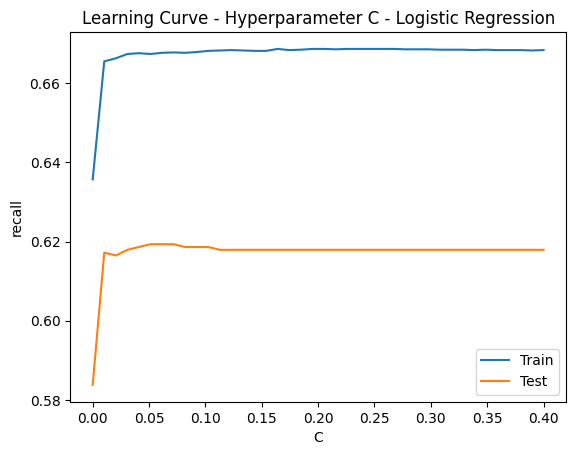

In [25]:
def draw_learning_curve_lr(param_values):
    train_scores = []
    test_scores = []

    for c in param_values:
        model = LogisticRegression(penalty='l2', C=c)
        model.fit(X_over_smote, y_over_smote)

        # eval on train
        y_pred_train = model.predict(X_over_smote)
        train_recall = recall_score(y_over_smote, y_pred_train)
        train_scores.append(train_recall)

        # eval on test
        y_pred = model.predict(X_test)
        test_recall = recall_score(y_test, y_pred)
        test_scores.append(test_recall)

        print('param value: ' + str(c) + '; train: ' + str(train_recall) + '; test: '+ str(test_recall))

    plt.plot(param_values, train_scores, label='Train')
    plt.plot(param_values, test_scores, label='Test')
    plt.xlabel('C')
    plt.ylabel('recall')
    plt.title('Learning Curve - Hyperparameter C - Logistic Regression')
    plt.legend()
    plt.show()

param_values = [float(x) for x in np.linspace(0.0001, 0.4, 40)]
draw_learning_curve_lr(param_values)

Best range nilai C = 0.05 - 0.1

##### Model After Learning Curve

In [26]:
from sklearn.model_selection import GridSearchCV
import numpy as np

penalty = ['l1', 'l2']
C = [float(x) for x in np.linspace(0.05, 0.1, 10)]
hyperparameters = dict(penalty=penalty, C=C)

lr = LogisticRegression()
model = GridSearchCV(lr, hyperparameters, scoring='recall', cv=5)
model.fit(X_over_smote, y_over_smote)
smote_sampling_eval(model)

Accuracy (Train Set): 0.68
Accuracy (Test Set): 0.70
Precision (Train Set): 0.69
Precision (Test Set): 0.40
Recall (Train Set): 0.67
Recall (Test Set): 0.62
AUC (train-proba): 0.74
AUC (test-proba): 0.72
F1-Score (Train Set): 0.68
F1-Score (Test Set): 0.48


#### Decision Tree

In [27]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state = 42)
dt.fit(X_over, y_over) 
over_sampling_eval(dt)

Accuracy (Train Set): 1.00
Accuracy (Test Set): 0.72
Precision (Train Set): 1.00
Precision (Test Set): 0.38
Recall (Train Set): 1.00
Recall (Test Set): 0.40
AUC (train-proba): 1.00
AUC (test-proba): 0.60
F1-Score (Train Set): 1.00
F1-Score (Test Set): 0.39


##### Hyperparameter Tuning

In [28]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from scipy.stats import uniform
import numpy as np

# List of hyperparameter
max_depth = [int(x) for x in np.linspace(1, 110, num = 30)] # Maximum number of levels in tree
min_samples_split = [2, 5, 10, 100] # Minimum number of samples required to split a node
min_samples_leaf = [1, 2, 4, 10, 20, 50] # Minimum number of samples required at each leaf node
max_features = ['auto', 'sqrt'] # Number of features to consider at every split
criterion = ['gini','entropy']
splitter = ['best','random']

hyperparameters = dict(max_depth=max_depth, 
                       min_samples_split=min_samples_split, 
                       min_samples_leaf=min_samples_leaf,
                       max_features=max_features,
                       criterion=criterion,
                       splitter=splitter
                      )

# Inisialisasi Model
dt = DecisionTreeClassifier(random_state=42)
model = RandomizedSearchCV(dt, hyperparameters, cv=5, scoring='recall')
model.fit(X_over, y_over)

# Predict & Evaluation
y_pred = model.predict(X_test)#Check performa dari model
over_sampling_eval(model)

Accuracy (Train Set): 0.85
Accuracy (Test Set): 0.71
Precision (Train Set): 0.85
Precision (Test Set): 0.38
Recall (Train Set): 0.85
Recall (Test Set): 0.50
AUC (train-proba): 0.94
AUC (test-proba): 0.67
F1-Score (Train Set): 0.85
F1-Score (Test Set): 0.43


##### Analyzing Curve

Max_Depth

param value: 1; train: 0.5118497394040712; test: 0.5241477272727273
param value: 2; train: 0.5850132756416561; test: 0.578125
param value: 3; train: 0.5850132756416561; test: 0.578125
param value: 4; train: 0.5508899596813847; test: 0.5340909090909091
param value: 5; train: 0.5722293244173469; test: 0.5504261363636364
param value: 6; train: 0.580686399842659; test: 0.5411931818181818
param value: 7; train: 0.6335922902940309; test: 0.5625
param value: 8; train: 0.6432294227554332; test: 0.5440340909090909
param value: 9; train: 0.6940702133936474; test: 0.5632102272727273
param value: 10; train: 0.7135411544891337; test: 0.5440340909090909
param value: 11; train: 0.7357655620021635; test: 0.5376420454545454
param value: 12; train: 0.7979152325695742; test: 0.5511363636363636
param value: 13; train: 0.8381355098829777; test: 0.5326704545454546
param value: 14; train: 0.8639000885042777; test: 0.5134943181818182
param value: 15; train: 0.8944832333562789; test: 0.5113636363636364
param v

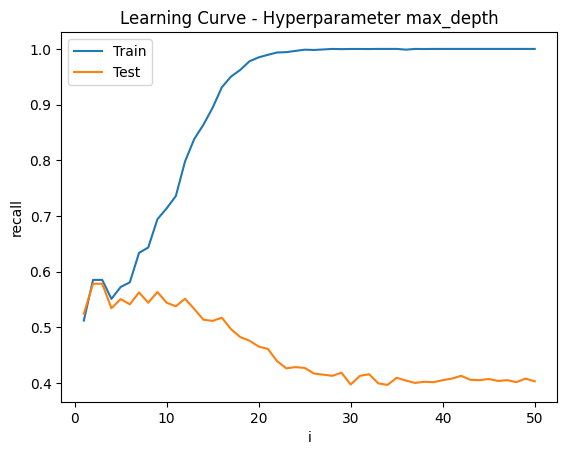

In [29]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.tree import DecisionTreeClassifier

def draw_learning_curve_dt(param_values):
    train_scores = []
    test_scores = []

    for i in param_values:
        model = DecisionTreeClassifier(max_depth=i)
        model.fit(X_over, y_over)

        # eval on train
        y_pred_train = model.predict(X_over)
        train_recall = recall_score(y_over, y_pred_train)
        train_scores.append(train_recall)

        # eval on test
        y_pred = model.predict(X_test)
        test_recall = recall_score(y_test, y_pred)
        test_scores.append(test_recall)

        print('param value: ' + str(i) + '; train: ' + str(train_recall) + '; test: '+ str(test_recall))

    plt.plot(param_values, train_scores, label='Train')
    plt.plot(param_values, test_scores, label='Test')
    plt.xlabel('i')
    plt.ylabel('recall')
    plt.title('Learning Curve - Hyperparameter max_depth')
    plt.legend()
    plt.show()

# learning curve
import numpy as np
param_values = [int(x) for x in np.linspace(1,50,50)]
draw_learning_curve_dt(param_values)

Dari max_depth, nilai kedalaman ideal berada pada sekitaran range 1 hingga 10

##### Min_Samples_Leaf

param value: 1; train: 1.0; test: 0.40625
param value: 2; train: 0.9858393155669191; test: 0.43323863636363635
param value: 3; train: 0.9714819549611564; test: 0.4375
param value: 4; train: 0.9455207001671747; test: 0.44957386363636365
param value: 5; train: 0.9379486675189301; test: 0.4659090909090909
param value: 6; train: 0.9112007080342217; test: 0.4538352272727273
param value: 7; train: 0.9006785327957518; test: 0.4680397727272727
param value: 8; train: 0.8973350378601632; test: 0.49076704545454547
param value: 9; train: 0.89812174255089; test: 0.5142045454545454
param value: 10; train: 0.8816992821319697; test: 0.515625
param value: 11; train: 0.8854361294129216; test: 0.5184659090909091
param value: 12; train: 0.8727505162749533; test: 0.5142045454545454
param value: 13; train: 0.8681286262169338; test: 0.5269886363636364
param value: 14; train: 0.8609499459140525; test: 0.5348011363636364
param value: 15; train: 0.8660635264037762; test: 0.5482954545454546
param value: 16; trai

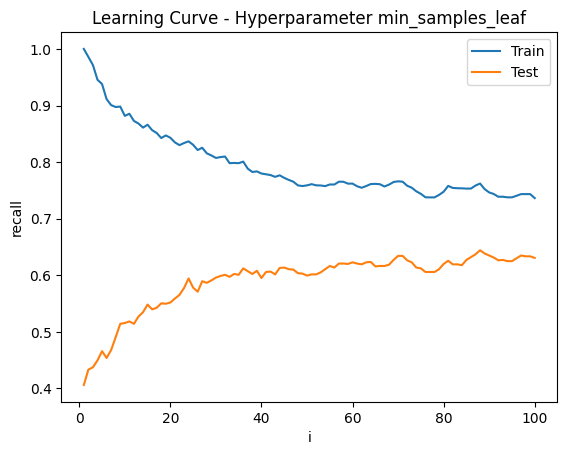

In [30]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.tree import DecisionTreeClassifier

def draw_learning_curve_dt(param_values):
    train_scores = []
    test_scores = []

    for i in param_values:
        model = DecisionTreeClassifier(min_samples_leaf=i)
        model.fit(X_over, y_over)

        # eval on train
        y_pred_train = model.predict(X_over)
        train_recall = recall_score(y_over, y_pred_train)
        train_scores.append(train_recall)

        # eval on test
        y_pred = model.predict(X_test)
        test_recall = recall_score(y_test, y_pred)
        test_scores.append(test_recall)

        print('param value: ' + str(i) + '; train: ' + str(train_recall) + '; test: '+ str(test_recall))

    plt.plot(param_values, train_scores, label='Train')
    plt.plot(param_values, test_scores, label='Test')
    plt.xlabel('i')
    plt.ylabel('recall')
    plt.title('Learning Curve - Hyperparameter min_samples_leaf')
    plt.legend()
    plt.show()

# learning curve
import numpy as np
param_values = [int(x) for x in np.linspace(1,100,100)]
draw_learning_curve_dt(param_values)

Dari min_samples_leaf, nilai kedalaman ideal berada pada sekitaran range 80 hingga 100

##### Model With Parameter After Learning Curve

In [31]:
from sklearn.model_selection import GridSearchCV
from scipy.stats import uniform
import numpy as np

# List of hyperparameter
max_depth = [int(x) for x in np.linspace(1,10,10)] # Maximum number of levels in tree
min_samples_leaf = [int(x) for x in np.linspace(80,100,20)] # Minimum number of samples required at each leaf node

hyperparameters = dict(max_depth=max_depth, 
                       min_samples_leaf=min_samples_leaf,
                       )

# Inisialisasi Model
dt = DecisionTreeClassifier(random_state=42)
model = GridSearchCV(dt, hyperparameters, cv=5, scoring='recall')
model.fit(X_over, y_over)

# Predict & Evaluation
y_pred = model.predict(X_test)#Check performa dari model
over_sampling_eval(model)

Accuracy (Train Set): 0.73
Accuracy (Test Set): 0.74
Precision (Train Set): 0.76
Precision (Test Set): 0.44
Recall (Train Set): 0.68
Recall (Test Set): 0.61
AUC (train-proba): 0.81
AUC (test-proba): 0.75
F1-Score (Train Set): 0.72
F1-Score (Test Set): 0.51


### XGBoost

#### Model

In [32]:
from xgboost import XGBClassifier
xg = XGBClassifier(random_state=42)
xg.fit(X_over_smote, y_over_smote)
smote_sampling_eval(xg)

Accuracy (Train Set): 0.94
Accuracy (Test Set): 0.80
Precision (Train Set): 0.97
Precision (Test Set): 0.56
Recall (Train Set): 0.90
Recall (Test Set): 0.43
AUC (train-proba): 0.99
AUC (test-proba): 0.75
F1-Score (Train Set): 0.94
F1-Score (Test Set): 0.49


#### Hyperparameter Tuning

In [33]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

#Menjadikan ke dalam bentuk dictionary
hyperparameters = {
                    'max_depth' : [int(x) for x in np.linspace(0, 1, num = 10)],
                    'min_child_weight' : [int(x) for x in np.linspace(1, 10, num = 11)],
                    'gamma' : [float(x) for x in np.linspace(0, 1, num = 11)],
                    'tree_method' : ['auto', 'exact', 'approx', 'hist'],

                    'colsample_bytree' : [float(x) for x in np.linspace(0, 1, num = 11)],
                    'eta' : [float(x) for x in np.linspace(0, 1, num = 100)],

                    'lambda' : [float(x) for x in np.linspace(0, 1, num = 11)],
                    'alpha' : [float(x) for x in np.linspace(0, 1, num = 11)]
                    }

# Init
from xgboost import XGBClassifier
xg = XGBClassifier(random_state=42)
xg_tuned = RandomizedSearchCV(xg, hyperparameters, cv=5, random_state=42, scoring='recall')
xg_tuned.fit(X_over_smote, y_over_smote)

# Predict & Evaluation
smote_sampling_eval(xg_tuned)

Accuracy (Train Set): 0.99
Accuracy (Test Set): 0.77
Precision (Train Set): 0.99
Precision (Test Set): 0.47
Recall (Train Set): 0.99
Recall (Test Set): 0.41
AUC (train-proba): 1.00
AUC (test-proba): 0.71
F1-Score (Train Set): 0.99
F1-Score (Test Set): 0.44


#### Analyzing Curver Max_Depth

param value: 1; train: 0.6434260989281149; test: 0.5731534090909091
param value: 1; train: 0.6434260989281149; test: 0.5731534090909091
param value: 2; train: 0.7653653259907562; test: 0.5106534090909091
param value: 3; train: 0.8108958599665651; test: 0.45951704545454547
param value: 4; train: 0.8419706952502705; test: 0.44673295454545453
param value: 5; train: 0.8705870783754548; test: 0.4303977272727273
param value: 6; train: 0.9024486183498869; test: 0.4296875
param value: 7; train: 0.931261677647753; test: 0.40767045454545453
param value: 8; train: 0.9654833316943652; test: 0.41051136363636365
param value: 9; train: 0.9819057921132854; test: 0.41761363636363635
param value: 10; train: 0.9903628675385977; test: 0.4140625


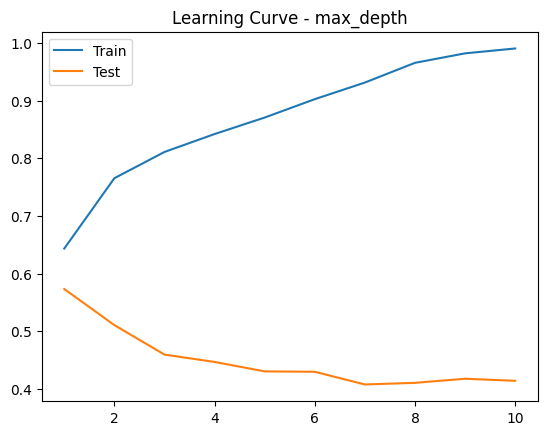

In [34]:
param_values = [int(x) for x in np.linspace(1, 10, 11)] 

train_scores = []
test_scores = []

for c in param_values:
    model = XGBClassifier(max_depth=c, random_state=42)
    model.fit(X_over_smote, y_over_smote)
       
    # eval on train
    y_pred_train = model.predict(X_over_smote)
    train_recall = recall_score(y_over_smote, y_pred_train)
    train_scores.append(train_recall)

    # eval on test
    y_pred = model.predict(X_test)
    test_recall = recall_score(y_test, y_pred)
    test_scores.append(test_recall)


    print('param value: ' + str(c) + '; train: ' + str(train_recall) + '; test: '+ str(test_recall))

plt.plot(param_values, train_scores, label='Train')
plt.plot(param_values, test_scores, label='Test')
plt.title('Learning Curve - max_depth')
plt.legend()
plt.show()

parameter max_depth terbaik = 1 - 3

##### Model After Learning Curve

In [35]:
from sklearn.model_selection import RandomizedSearchCV

#Menjadikan ke dalam bentuk dictionary
hyperparameters = {
                    'max_depth' : [int(x) for x in np.linspace(1, 4, num = 10)],
                    'min_child_weight' : [int(x) for x in np.linspace(1, 10, num = 11)],
                    'gamma' : [float(x) for x in np.linspace(0, 1, num = 11)],
                    'tree_method' : ['auto', 'exact', 'approx', 'hist'],

                    'colsample_bytree' : [float(x) for x in np.linspace(0, 1, num = 11)],
                    'eta' : [float(x) for x in np.linspace(0, 1, num = 100)],

                    'lambda' : [float(x) for x in np.linspace(0, 1, num = 11)],
                    'alpha' : [float(x) for x in np.linspace(0, 1, num = 11)]
                    }

# Init
from xgboost import XGBClassifier
xg = XGBClassifier(random_state=42)
xg_tuned = RandomizedSearchCV(xg, hyperparameters, cv=5, scoring='recall')
xg_tuned.fit(X_over_smote, y_over_smote)

# Predict & Evaluation
smote_sampling_eval(xg_tuned)

Accuracy (Train Set): 0.88
Accuracy (Test Set): 0.80
Precision (Train Set): 0.93
Precision (Test Set): 0.56
Recall (Train Set): 0.83
Recall (Test Set): 0.42
AUC (train-proba): 0.95
AUC (test-proba): 0.75
F1-Score (Train Set): 0.88
F1-Score (Test Set): 0.48


### Random Forest

#### Model

In [36]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=42)
rf.fit(X_under, y_under)
under_sampling_eval(rf)

Accuracy (Train Set): 1.00
Accuracy (Test Set): 0.74
Precision (Train Set): 1.00
Precision (Test Set): 0.44
Recall (Train Set): 1.00
Recall (Test Set): 0.63
AUC (train-proba): 1.00
AUC (test-proba): 0.75
F1-Score (Train Set): 1.00
F1-Score (Test Set): 0.52


#### Hyperparameter Tuning

In [37]:
# list hyperparameter
n_estimators = [int(x) for x in np.linspace(1, 200, 50)]
criterion = ['gini', 'entropy']
max_depth = [int(x) for x in np.linspace(2, 100, 50)]
min_samples_split = [int(x) for x in np.linspace(2, 20, 10)]
min_samples_leaf = [int(x) for x in np.linspace(2, 20, 10)]
hyperparameters = dict(n_estimators=n_estimators, criterion=criterion, max_depth=max_depth,
                       min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf)

rf = RandomForestClassifier(random_state=42)
rs = RandomizedSearchCV(rf, hyperparameters, scoring='recall', random_state=1, cv=5)
rs.fit(X_under, y_under)
under_sampling_eval(rs)

Accuracy (Train Set): 0.79
Accuracy (Test Set): 0.71
Precision (Train Set): 0.81
Precision (Test Set): 0.41
Recall (Train Set): 0.75
Recall (Test Set): 0.64
AUC (train-proba): 0.88
AUC (test-proba): 0.75
F1-Score (Train Set): 0.78
F1-Score (Test Set): 0.50


#### Analyzing Curve Min_Samples_Leaf

param value: 2; train: 0.7591027308192457; test: 0.6363636363636364
param value: 3; train: 0.758777633289987; test: 0.6299715909090909
param value: 4; train: 0.7483745123537061; test: 0.6285511363636364
param value: 5; train: 0.7548764629388817; test: 0.6328125
param value: 7; train: 0.75; test: 0.6221590909090909
param value: 8; train: 0.7516254876462939; test: 0.6285511363636364
param value: 9; train: 0.7519505851755527; test: 0.6313920454545454
param value: 11; train: 0.7633289986996099; test: 0.6335227272727273
param value: 12; train: 0.7613784135240572; test: 0.6356534090909091
param value: 13; train: 0.7532509752925878; test: 0.6242897727272727
param value: 14; train: 0.7555266579973993; test: 0.6257102272727273
param value: 16; train: 0.7496749024707412; test: 0.6271306818181818
param value: 17; train: 0.7597529258777633; test: 0.6292613636363636
param value: 18; train: 0.7633289986996099; test: 0.6306818181818182
param value: 20; train: 0.7571521456436932; test: 0.6299715909090

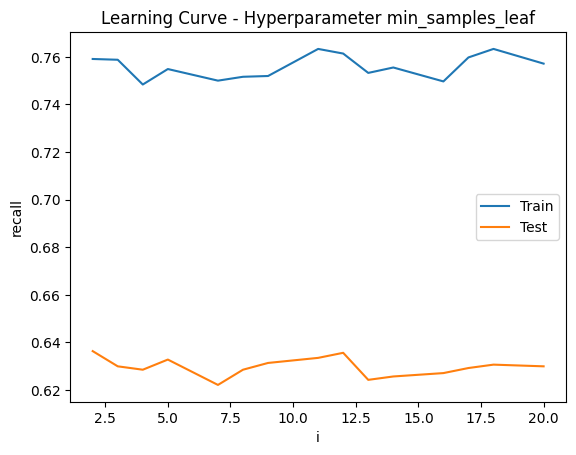

In [38]:
def draw_learning_curve_rf(param_values):
    train_scores = []
    test_scores = []

    for i in param_values:
        model = RandomForestClassifier(n_estimators=75, min_samples_leaf=c)
        model.fit(X_under, y_under)

        # eval on train
        y_pred_train = model.predict(X_under)
        train_recall = recall_score(y_under, y_pred_train)
        train_scores.append(train_recall)

        # eval on test
        y_pred = model.predict(X_test)
        test_recall = recall_score(y_test, y_pred)
        test_scores.append(test_recall)

        print('param value: ' + str(i) + '; train: ' + str(train_recall) + '; test: '+ str(test_recall))

    plt.plot(param_values, train_scores, label='Train')
    plt.plot(param_values, test_scores, label='Test')
    plt.xlabel('i')
    plt.ylabel('recall')
    plt.title('Learning Curve - Hyperparameter min_samples_leaf')
    plt.legend()
    plt.show()

# learning curve
import numpy as np
param_values = [int(x) for x in np.linspace(2,20,15)]
draw_learning_curve_rf(param_values)

param value: 2; train: 0.9544863459037711; test: 0.6420454545454546
param value: 3; train: 0.9583875162548765; test: 0.6356534090909091
param value: 4; train: 0.9541612483745123; test: 0.6313920454545454
param value: 5; train: 0.9541612483745123; test: 0.6285511363636364
param value: 7; train: 0.9544863459037711; test: 0.6313920454545454
param value: 8; train: 0.9554616384915474; test: 0.6335227272727273
param value: 9; train: 0.951885565669701; test: 0.6271306818181818
param value: 11; train: 0.9554616384915474; test: 0.6321022727272727
param value: 12; train: 0.9564369310793238; test: 0.6292613636363636
param value: 13; train: 0.9554616384915474; test: 0.6306818181818182
param value: 14; train: 0.9570871261378413; test: 0.6356534090909091
param value: 16; train: 0.9554616384915474; test: 0.6214488636363636
param value: 17; train: 0.9570871261378413; test: 0.6292613636363636
param value: 18; train: 0.9574122236671001; test: 0.640625
param value: 20; train: 0.9580624187256177; test: 0.

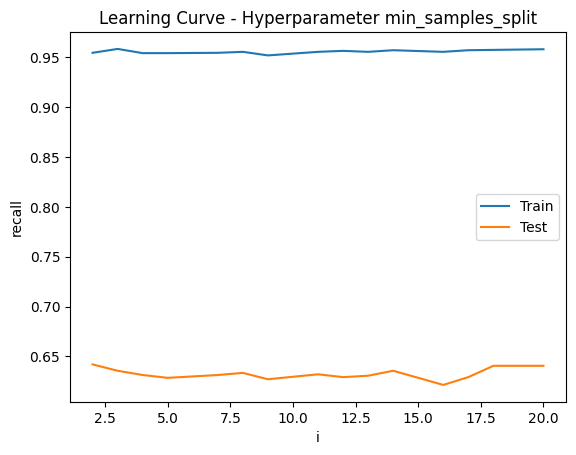

In [39]:
def draw_learning_curve_rf(param_values):
    train_scores = []
    test_scores = []

    for i in param_values:
        model = RandomForestClassifier(n_estimators=75, min_samples_split=c)
        model.fit(X_under, y_under)

        # eval on train
        y_pred_train = model.predict(X_under)
        train_recall = recall_score(y_under, y_pred_train)
        train_scores.append(train_recall)

        # eval on test
        y_pred = model.predict(X_test)
        test_recall = recall_score(y_test, y_pred)
        test_scores.append(test_recall)

        print('param value: ' + str(i) + '; train: ' + str(train_recall) + '; test: '+ str(test_recall))

    plt.plot(param_values, train_scores, label='Train')
    plt.plot(param_values, test_scores, label='Test')
    plt.xlabel('i')
    plt.ylabel('recall')
    plt.title('Learning Curve - Hyperparameter min_samples_split')
    plt.legend()
    plt.show()

# learning curve
import numpy as np
param_values = [int(x) for x in np.linspace(2,20,15)]
draw_learning_curve_rf(param_values)

In [40]:
# list hyperparameter
n_estimators = [int(x) for x in np.linspace(1, 200, 50)]
criterion = ['gini', 'entropy']
max_depth = [int(x) for x in np.linspace(2, 100, 50)]
min_samples_split = [5]
min_samples_leaf = [2,7,11,17]
hyperparameters = dict(n_estimators=n_estimators, criterion=criterion, max_depth=max_depth,
                       min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf)

rf = RandomForestClassifier(random_state=42)
rs = RandomizedSearchCV(rf, hyperparameters, scoring='recall', random_state=42, cv=5)
rs.fit(X_under, y_under)
under_sampling_eval(rs)

Accuracy (Train Set): 0.97
Accuracy (Test Set): 0.74
Precision (Train Set): 0.96
Precision (Test Set): 0.45
Recall (Train Set): 0.98
Recall (Test Set): 0.63
AUC (train-proba): 1.00
AUC (test-proba): 0.77
F1-Score (Train Set): 0.97
F1-Score (Test Set): 0.52


### Feature Importance

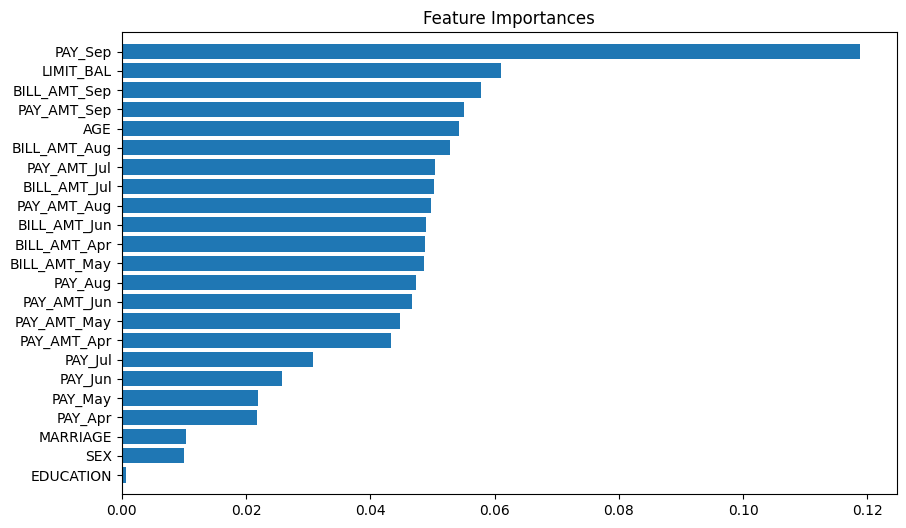

In [50]:
# Dapatkan feature importance dari model terbaik dan urutkan dari yang paling penting hingga paling tidak penting
importances = rs.best_estimator_.feature_importances_
indices = np.argsort(importances)[::-1]

# Buat plot feature importance dengan urutan dari yang paling penting hingga tidak penting dan orientasi horizontal
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.barh(range(X_train.shape[1]), importances[indices])
plt.yticks(range(X_train.shape[1]), X_train.columns[indices])
plt.ylim([-1, X_train.shape[1]])
plt.gca().invert_yaxis()
plt.show()

### Confusion Matrix

In [51]:
# print result
from sklearn.metrics import classification_report, confusion_matrix

y_pred = rs.predict(X_test)
# membuat confusion matrix
cm = confusion_matrix(y_test, y_pred)

# membuat DataFrame dari confusion matrix
df_cm = pd.DataFrame(cm, index=['actual No', 'actual Yes'], columns=['predict No', 'predict Yes'])

# mencetak DataFrame
print(df_cm)

            predict No  predict Yes
actual No         3782         1110
actual Yes         515          893


### Result

In [52]:
actual_default = len(dftrain[dftrain['default_payment_next_month']==1])
all_customer = len(dftrain)
default_rate = round(actual_default/all_customer,4)
default_rate_after = round((actual_default - cm[1][1])/all_customer,4)
print('default rate awal', default_rate*100,'%')
print('default rate setelah menerapkan model', default_rate_after*100,'%')

default rate awal 22.12 %
default rate setelah menerapkan model 17.87 %


Setelah disimulasikan menggunakan model machine learning, default paymet ratio berkurang menjadi 17.87%